In [1]:
import os

import wfdb
import matplotlib.pyplot as plt

import pantompkins

# Data acquisition

In [2]:
# Used to download data from Physionet
# wfdb.dl_database('mitdb', os.getcwd() + '/data')

In [3]:
# Set constants

# Sampling frequency
fs = 360

# Records 100-124, 200-234
record_number = 100

# Start and end of samples
sample_start = 0
sample_end = 3000

# Channel, either 0 or 1
channel = 0

In [4]:
signal, fields = wfdb.rdsamp(f'{os.getcwd()}/data/{record_number}', sampfrom=sample_start, sampto=sample_end)
single_channel_signal = signal[:, channel]
single_channel_signal

array([-0.145, -0.145, -0.145, ...,  0.875,  0.925,  0.795])

# Plot raw signal

Text(0.5, 1.0, 'Raw ECG waveform')

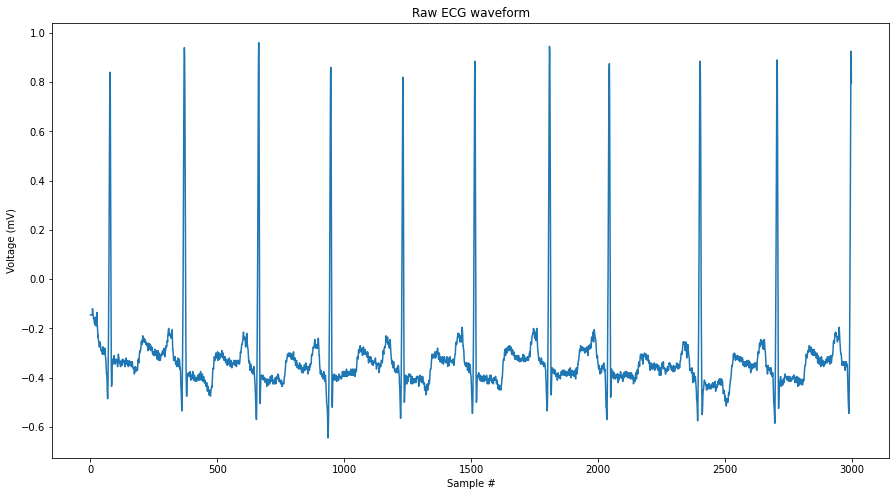

In [5]:
plt.figure(figsize=(15,8))
plt.plot(single_channel_signal)
plt.ylabel('Voltage (mV)')
plt.xlabel('Sample #')
plt.title('Raw ECG waveform')

# Resultant signals

Text(0, 0.5, 'Voltage (mV)')

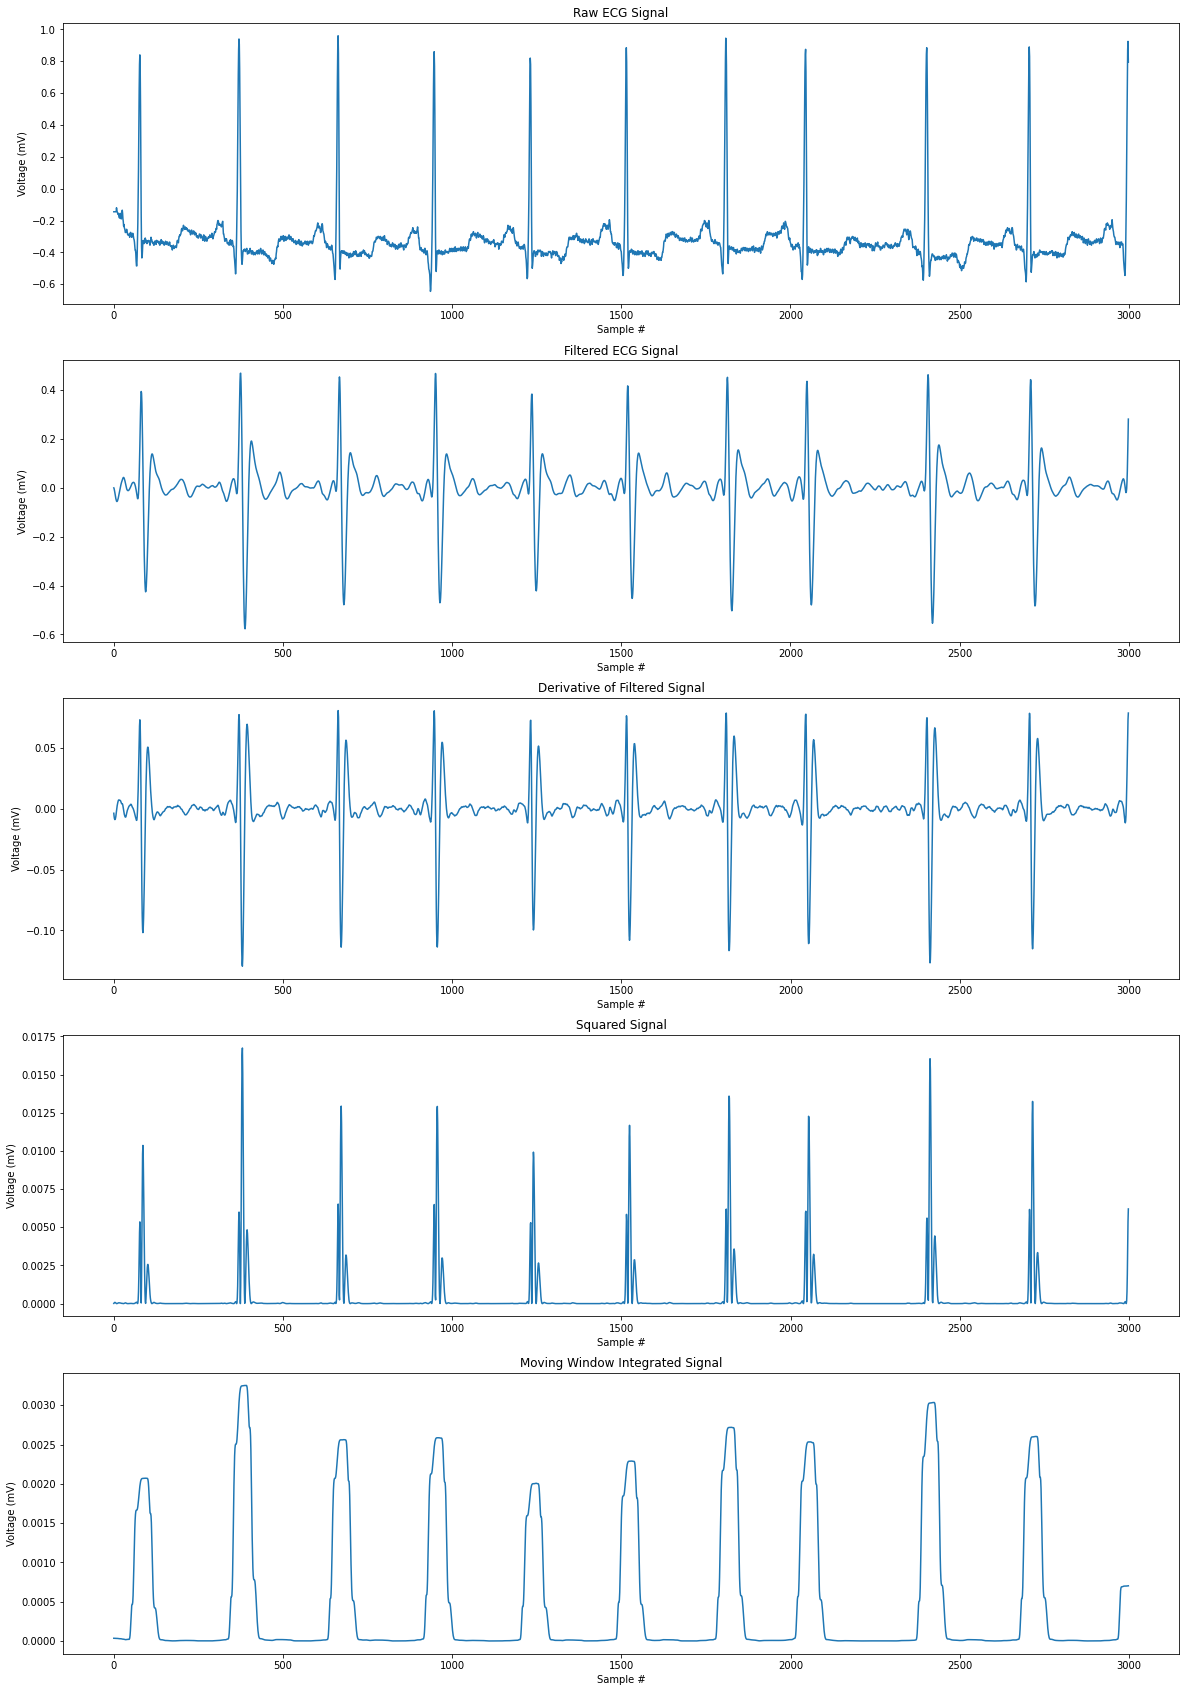

In [6]:
filtered_signal = pantompkins.filter_signal(single_channel_signal, fs)
derivative = pantompkins.derivative(filtered_signal)
squared_signal = pantompkins.square_signal(derivative)
integrated_signal = pantompkins.moving_window_integration(squared_signal, fs)

plt.figure(figsize=(20,30))
plt.subplot(511)
plt.plot(single_channel_signal)
plt.title('Raw ECG Signal')
plt.xlabel('Sample #')
plt.ylabel('Voltage (mV)')
plt.subplot(512)
plt.plot(filtered_signal)
plt.title('Filtered ECG Signal')
plt.xlabel('Sample #')
plt.ylabel('Voltage (mV)')
plt.subplot(513)
plt.plot(derivative)
plt.title('Derivative of Filtered Signal')
plt.xlabel('Sample #')
plt.ylabel('Voltage (mV)')
plt.subplot(514)
plt.plot(squared_signal)
plt.title('Squared Signal')
plt.xlabel('Sample #')
plt.ylabel('Voltage (mV)')
plt.subplot(515)
plt.plot(integrated_signal)
plt.title('Moving Window Integrated Signal')
plt.xlabel('Sample #')
plt.ylabel('Voltage (mV)')

# Calculate HR

In [7]:
heart_rate = pantompkins.compute_hr(single_channel_signal, fs)
heart_rate

72